# Projeto: predição de risco de acidente vascular cerebral (AVC)

O acidente vascular cerebral (AVC) é uma condição médica grave que ocorre quando há interrupção ou redução do fluxo sanguíneo para uma parte do cérebro, resultando em danos às células cerebrais. Representa uma das principais causas de morte no mundo e pode ter consequências graves, tanto físicas quanto cognitivas. Diante de sua alta incidência e impacto, a previsão do risco de desenvolvimento de AVC torna-se essencial para a adoção de medidas preventivas eficazes. Identificar precocemente indivíduos em maior risco permite intervenções clínicas e mudanças no estilo de vida que podem reduzir a ocorrência de novos casos e melhorar a qualidade de vida da população.

O conjunto de dados utilizado neste projeto foi construído com base em literatura médica, consultas a especialistas e modelagem estatística. As distribuições e relações de características foram inspiradas em observações clínicas do mundo real, garantindo validade médica. Nele há 70.000 registros e 18 características relacionadas a fatores de risco para desfecho de acidente vascular cerebral.

Fonte dos dados: [Kaggle](https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset)

## Dicionário de dados


`Chest Pain`: dor no peito -> 0 = Não, 1 = Sim;

`Shortness of Breath`: dificuldade para respirar -> 0 = Não, 1 = Sim;

`Irregular Heartbeat`: batimento cardíaco irregular -> 0 = Não, 1 = Sim;

`Fatigue & Weakness`: fadiga persistente e fraqueza muscular -> 0 = Não, 1 = Sim;

`Dizziness`: tonturas frequentes -> 0 = Não, 1 = Sim;

`Swelling (Edema)`: inchaço nas extremidades devido à retenção de líquidos -> 0 = Não, 1 = Sim;

`Pain in Neck/Jaw/Shoulder/Back`: dor no pescoço, mandíbula, ombro e costas -> 0 = Não, 1 = Sim;

`Excessive Sweating`: suor excessivo -> 0 = Não, 1 = Sim;

`Persistent Cough`: tosse crônica -> 0 = Não, 1 = Sim;

`Nausea/Vomiting`: náuseas ou vômitos frequentes -> 0 = Não, 1 = Sim;

`High Blood Pressure`: pressão alta -> 0 = Não, 1 = Sim;

`Chest Discomfort (Activity)`: desconforto no peito durante atividade física -> 0 = Não, 1 = Sim;

`Cold Hands/Feet`: frequentemente está com extremidades (mãos e pés) frias -> 0 = Não, 1 = Sim;

`Snoring/Sleep Apnea`: apneia do sono -> 0 = Não, 1 = Sim;

`Anxiety/Feeling of Doom`: ansiedade frequente ou sensação de desgraça iminente -> 0 = Não, 1 = Sim;

`Stroke Risk (%)`: risco percentual estimado de ter um acidente vascular cerebral -> valor contínuo de porcentagem (0-100%);

`At Risk (Binary)`: classificada como risco de acidente vascular cerebral -> 0 = Não, 1 = Sim;

`Age`: idade do indivíduo -> valor contínuo;

## Importações e ajustes iniciais

In [1]:
# Frameworks
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Configurações
from src.config import DADOS_LIMPOS
from src.clf_graphics import PALETTE

# Avisos
import warnings

In [2]:
# Ajustes
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:,.2f}".format

# Layout
sns.set_theme(style="darkgrid", context="notebook", palette=PALETTE)

## Análise exploratória

### Verificação inicial dos dados

In [3]:
df = pd.read_parquet(DADOS_LIMPOS)

In [4]:
df.head()

,age,anxiety_feeling_of_doom,at_risk,chest_discomfort_activity,chest_pain,cold_hands_feet,dizziness,excessive_sweating,fatigue_weakness,high_blood_pressure,irregular_heartbeat,nausea_vomiting,pain_in_neck_jaw_shoulder_back,persistent_cough,shortness_of_breath,snoring_sleep_apnea,stroke_risk,swelling_edema
0,54,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,58.00,No
1,49,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,40.50,Yes
2,62,No,Yes,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,Yes,52.00,Yes
3,48,No,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,60.00,Yes
4,61,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,56.50,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68979 entries, 0 to 68978
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   age                             68979 non-null  int8    
 1   anxiety_feeling_of_doom         68979 non-null  category
 2   at_risk                         68979 non-null  category
 3   chest_discomfort_activity       68979 non-null  category
 4   chest_pain                      68979 non-null  category
 5   cold_hands_feet                 68979 non-null  category
 6   dizziness                       68979 non-null  category
 7   excessive_sweating              68979 non-null  category
 8   fatigue_weakness                68979 non-null  category
 9   high_blood_pressure             68979 non-null  category
 10  irregular_heartbeat             68979 non-null  category
 11  nausea_vomiting                 68979 non-null  category
 12  pain_in_neck_jaw_s

### Entendimento dos dados

In [6]:
numeric_columns = ["age", "stroke_risk"]
target_column_clf = "at_risk"
binary_columns = [column for column in df.columns if column not in (numeric_columns + [target_column_clf])]

#### Variáveis numéricas

In [7]:
df.describe()

,age,stroke_risk
count,"68,979.00","68,979.00"
mean,54.05,55.56
std,21.07,14.30
min,18.00,5.00
25%,36.00,45.50
50%,54.00,55.50
75%,72.00,66.00
max,90.00,100.00


De acordo com as estatísticas acima, os dados parecem muito bem distribuídos. Não é comum na vida real, mas por serem dados sintéticos, não é estranho. Essa distribuição pode ser avaliada também graficamente.

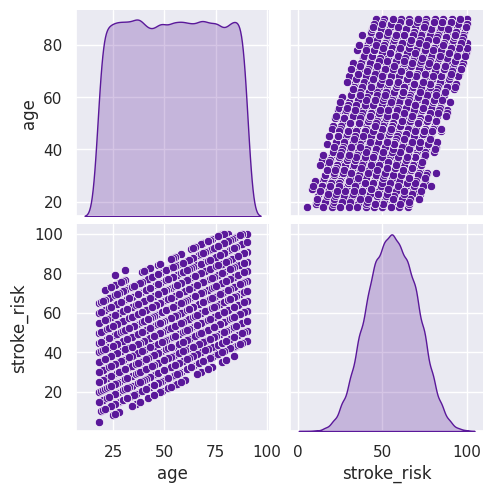

In [8]:
sns.pairplot(df, diag_kind="kde")

Ambas variáveis parecem ter certa relação positiva entre si, porém os valores são um pouco dispersos. Dado que a variável "stroke_risk" mede o desfecho de maneira percentual, entende-se que parece haver relação entre idade e risco de AVC. Além disso, a variável "stroke_risk" parece possuir uma distribuição normal neste dataset, enquanto as idades estão distribuídas de maneira mais uniforme.


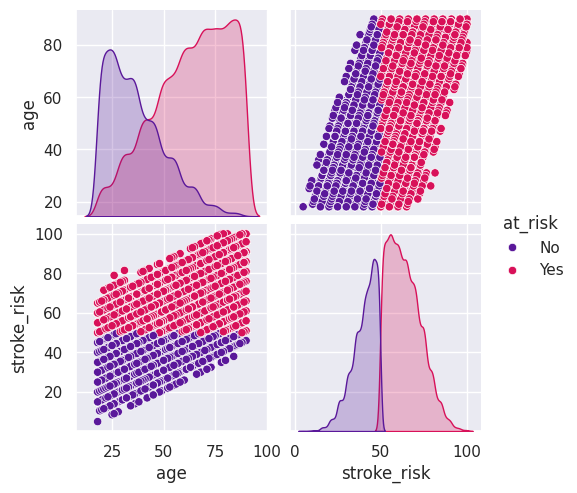

In [9]:
sns.pairplot(df, diag_kind="kde", hue=target_column_clf)

Ao realizar uma segregação das variáveis numéricas pela variável alvo categórica é possível perceber que a categoria "Sim" para risco de AVC é dada por volta dos 50% ou mais de chance de ter AVC, predito pela variável "stroke_risk".

Já a variável "age", assim como observado no gráfico sem segregação por desfecho, também se mostra relacionada de certa forma com o aumento de chance de AVC, sendo que quanto maior a idade, parece haver mais chance de desfecho positivo. Porém ainda há boa sobreposição entre desfecho positivo e negativo em várias faixas etárias.

In [10]:
corr_matrix = df.corr(numeric_only=True).style.format(precision=2).background_gradient(cmap="coolwarm", vmin=-1, vmax=1)
corr_matrix

,age,stroke_risk
age,1.00,0.73
stroke_risk,0.73,1.00


Assim como observado nos gráficos, a matriz acima mostra haver forte correlação positiva entre porcentagem de chance de AVC e idade.

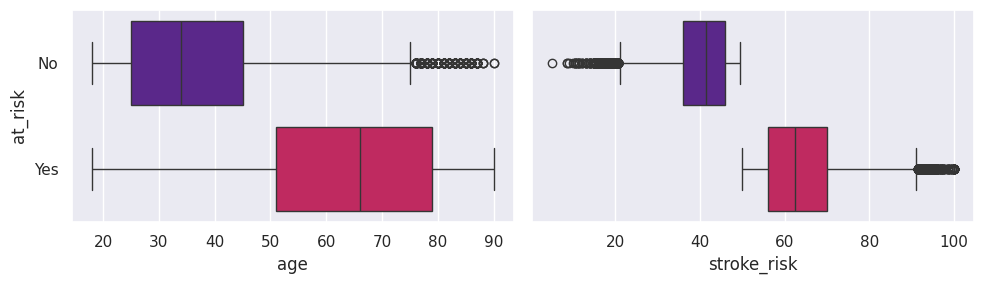

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), tight_layout=True, sharey=True)
for i, column in enumerate(numeric_columns):
  sns.boxplot(x=column, y=target_column_clf, data=df, hue=target_column_clf, ax=axs[i])
plt.show()

De modo similar aos gráficos, estes boxplots também mostram que há uma separação na categoria "Sim" para risco de AVC dada por volta dos 50% ou mais de chance de ter AVC, predito pela variável "stroke_risk". Há alguns outliers em "stroke_risk", sendo eles valores muito baixos para quem não tem chance de AVC de acordo com a categoria "at_risk" e valores muito altos para a categoria com chance de AVC.

Em relação à variável "age", conforme já observado, há sobreposição de desfechos em várias faixas etárias, porém as principais faixas etárias para cada tipo de desfecho estão bem distinguíveis. Além disso, há alguns ouliers em relação a faixas etárias maiores e que não possuem risco de AVC de acordo com a categoria "at_risk".

#### Variáveis categóricas

In [12]:
df.describe(exclude="number")

,anxiety_feeling_of_doom,at_risk,chest_discomfort_activity,chest_pain,cold_hands_feet,dizziness,excessive_sweating,fatigue_weakness,high_blood_pressure,irregular_heartbeat,nausea_vomiting,pain_in_neck_jaw_shoulder_back,persistent_cough,shortness_of_breath,snoring_sleep_apnea,swelling_edema
count,68979,68979,68979,68979,68979,68979,68979,68979,68979,68979,68979,68979,68979,68979,68979,68979
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,Yes
freq,34496,44782,34509,34598,34565,34703,34739,34513,34539,34553,34604,34558,34558,34716,34558,34537


Dentre as colunas categóricas, em uma análise simples podemos observar:

- A coluna "at_risk" (alvo categórico) possui um pouco mais de dados com a categoria "Yes", mas não é um desbalanceamento preocupante, ainda mais vindo de um dataset sintético;
- As demais colunas possuem as duas categorias bem distribuídas.

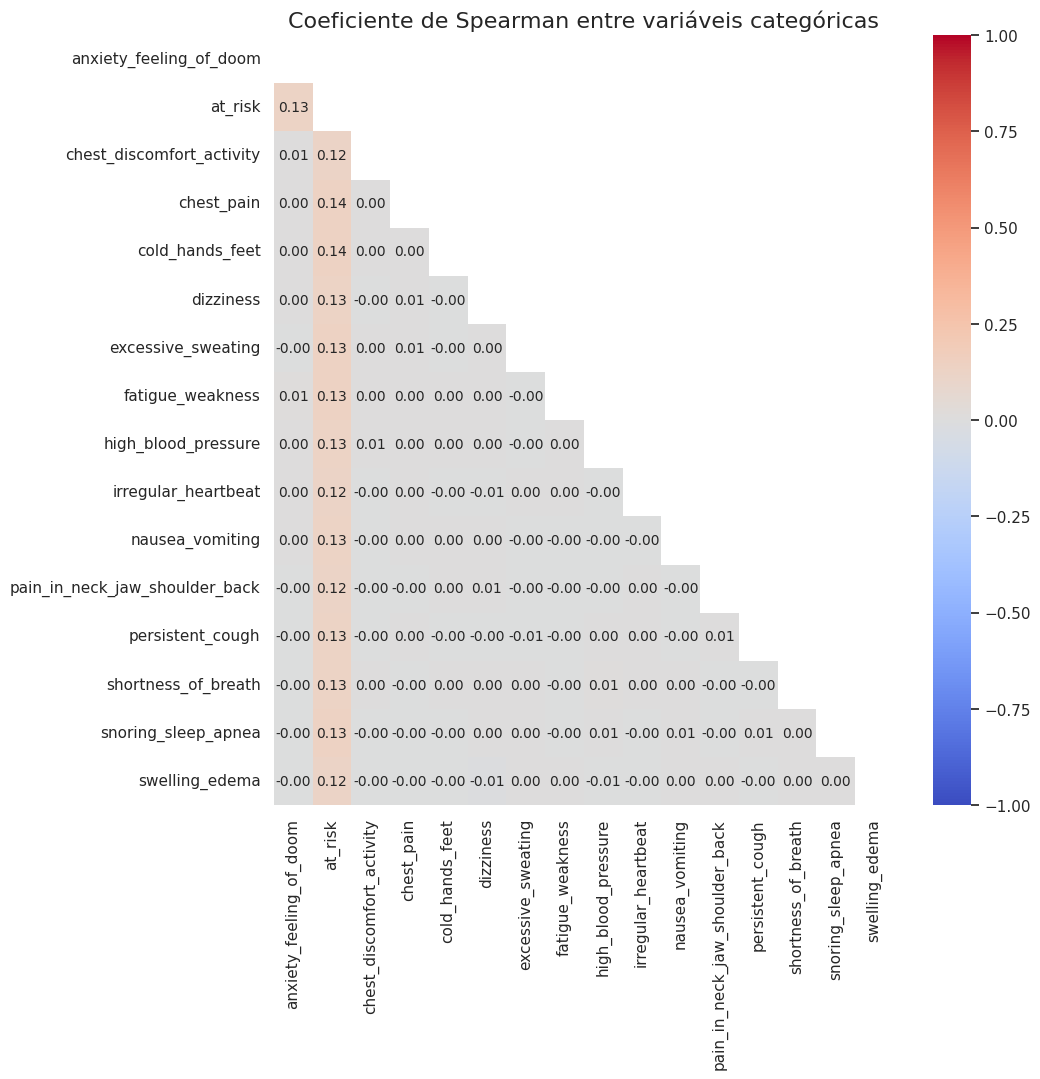

In [13]:
corr_categoricas = df.select_dtypes("category").apply(lambda coluna: coluna.cat.codes).corr(method="spearman", numeric_only=False)

fig, ax = plt.subplots(figsize=(10, 10))
matrix = np.triu(corr_categoricas)
corr = sns.heatmap(corr_categoricas, mask=matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", annot_kws={"fontsize": 10}, vmin=-1, vmax=1)
corr.grid(False)
ax.set_facecolor("white")
plt.title("Coeficiente de Spearman entre variáveis categóricas", fontsize=16)
plt.show()

Ao observar a matriz de correlação percebe-se que praticamente não há correlação entre as variáveis categóricas. As maiores correlações (ainda bem fracas) são das features com a variável alvo.

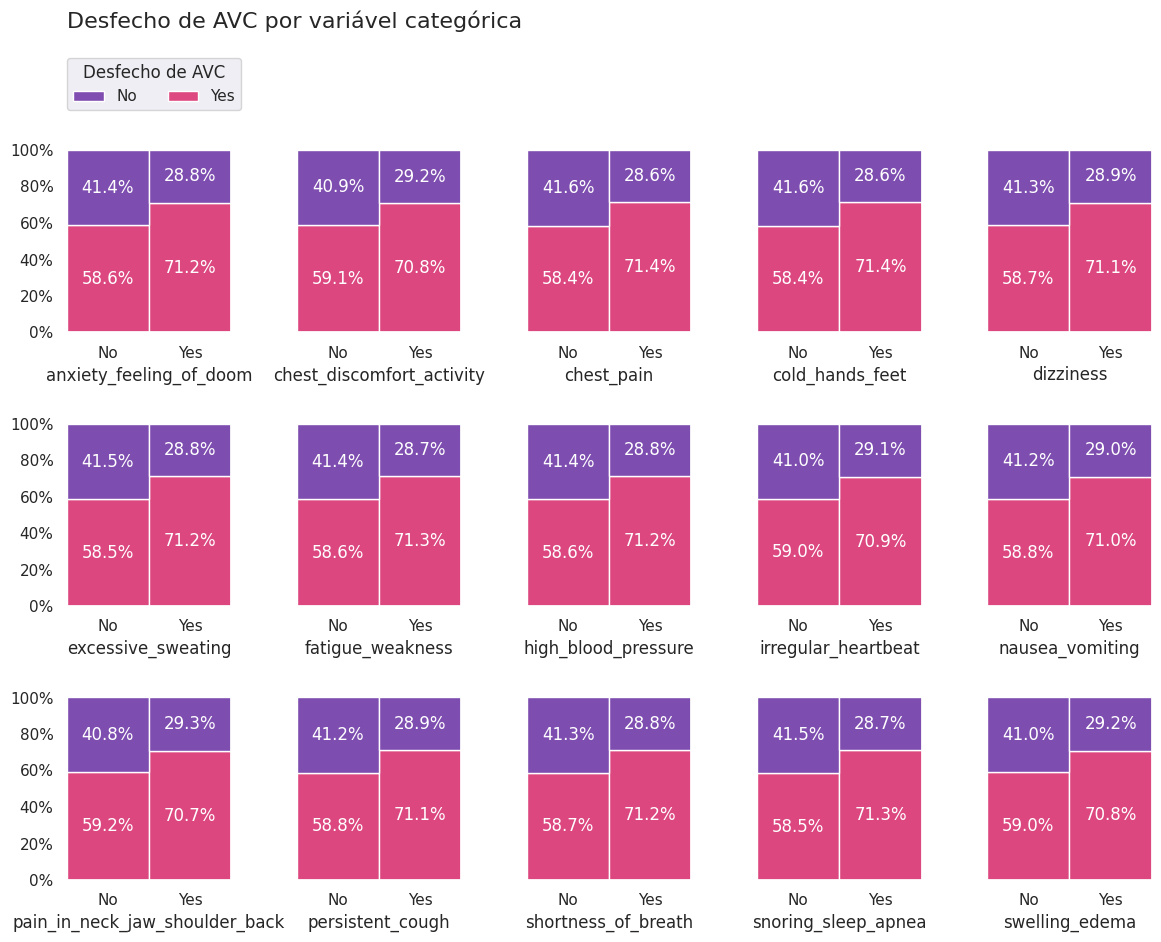

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(14, 10), sharey=True)

for i, column in enumerate(binary_columns):
  hist = sns.histplot(x=column, data=df, hue=target_column_clf, multiple="fill", ax=axs.flat[i], stat="percent", common_norm=True)
  hist.grid(False)
  hist.yaxis.set_major_formatter(PercentFormatter(1))
  hist.set_ylabel("")

  for bar in hist.containers:
    hist.bar_label(bar, label_type="center", labels=[f"{particao.get_height():.1%}" for particao in bar], color="white")

  legenda = hist.get_legend()
  legenda.remove()

rotulos = [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc="upper left", ncols=2, title="Desfecho de AVC", bbox_to_anchor=(0.12, 0.94))
fig.suptitle("Desfecho de AVC por variável categórica", x=0.45, ha="right", fontsize=16)
fig.align_labels()
plt.subplots_adjust(wspace=0.4, hspace=0.5, top=0.84)

plt.show()

A partir do gráfico acima é possível perceber que, de modo geral, a maior parte dos que responderam "Sim" para as categorias analisadas tiveram risco de desfecho de AVC, porcentagem essa maior do que a quantidade de pessoas com risco de AVC que responderam "Não".